# Inspect Slycot

This notebook shows how to inspect the slycot module.
The result gives us a first insight which slicot procedures are implemented.
In addition we get some insight about the organization of the slycot module.

In [1]:
import re
import slycot
print(slycot.__version__)

0.5.5.dev75+g8cd8497


##  Helper functions

In [2]:
def print_list_chunks(routines_list, n=6):
    """Print list in chunks of lists."""
    start = 0
    end = len(routines_list)
    step = n
    for i in range(start, end, step):
        x = i
        print(routines_list[x:x+step])

In [3]:
def get_slycot_routines(sly):
    all_attributes = dir(sly)
    r = re.compile("[a-z][a-z][0-9][0-9a-z][a-z][a-z]")
    matched_attributes = list(filter(r.match, all_attributes)) # Read Note below
    return matched_attributes

## Inspect Wrapper function

### Outer wrapper

In [4]:
slycot_wrapper = get_slycot_routines(slycot)

print(f"There are currently {len(slycot_wrapper)} routines that are found in slycot.")
print("------")
print(print_list_chunks(slycot_wrapper))

There are currently 56 routines that are found in slycot.
------
['ab01nd', 'ab04md', 'ab05md', 'ab05nd', 'ab07nd', 'ab08nd']
['ab08nz', 'ab09ad', 'ab09ax', 'ab09bd', 'ab09md', 'ab09nd']
['ab13bd', 'ab13dd', 'ab13ed', 'ab13fd', 'ab13md', 'ag08bd']
['mb02ed', 'mb03rd', 'mb03vd', 'mb03vy', 'mb03wd', 'mb05md']
['mb05nd', 'mc01td', 'sb01bd', 'sb02md', 'sb02mt', 'sb02od']
['sb03md', 'sb03md57', 'sb03od', 'sb04md', 'sb04qd', 'sb10ad']
['sb10dd', 'sb10fd', 'sb10hd', 'sb10jd', 'sb10yd', 'sg02ad']
['sg03ad', 'sg03bd', 'tb01id', 'tb01pd', 'tb03ad', 'tb04ad']
['tb05ad', 'tc01od', 'tc04ad', 'td04ad', 'tf01md', 'tf01rd']
['tg01ad', 'tg01fd']
None


### Inner wrapper

In [5]:
slycot_f2py_wrapper = get_slycot_routines(slycot._wrapper)

print(f"There are currently {len(slycot_f2py_wrapper)} routines that are found in slycot._wrapper.")
print("------")
print(print_list_chunks(slycot_f2py_wrapper))

There are currently 74 routines that are found in slycot._wrapper.
------
['ab01nd', 'ab04md', 'ab05md', 'ab05nd', 'ab07nd', 'ab08nd']
['ab08nz', 'ab09ad', 'ab09ax', 'ab09bd', 'ab09md', 'ab09nd']
['ab13bd', 'ab13dd', 'ab13ed', 'ab13fd', 'ab13md', 'ag08bd']
['mb02ed', 'mb03rd', 'mb03vd', 'mb03vy', 'mb03wd', 'mb05md']
['mb05nd', 'mc01td', 'sb01bd', 'sb02md', 'sb02mt_c', 'sb02mt_cl']
['sb02mt_n', 'sb02mt_nl', 'sb02od_b', 'sb02od_c', 'sb02od_d', 'sb02od_n']
['sb03md', 'sb03od', 'sb04md', 'sb04qd', 'sb10ad', 'sb10dd']
['sb10fd', 'sb10hd', 'sb10jd', 'sb10yd', 'sg02ad_bb', 'sg02ad_bc']
['sg02ad_bd', 'sg02ad_bn', 'sg02ad_g', 'sg03ad', 'sg03bd', 'tb01id']
['tb01pd', 'tb03ad_l', 'tb03ad_r', 'tb04ad_c', 'tb04ad_r', 'tb05ad_ag']
['tb05ad_ng', 'tb05ad_nh', 'tc01od_l', 'tc01od_r', 'tc04ad_l', 'tc04ad_r']
['td04ad_c', 'td04ad_r', 'tf01md', 'tf01rd', 'tg01ad', 'tg01fd_ii']
['tg01fd_nn', 'tg01fd_uu']
None


## Generate Sets for the Venn-Diagramm

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [7]:
not_in_slycot_f2py_wrapper = list(set(slycot_wrapper) - set(slycot_f2py_wrapper))
not_in_slycot_f2py_wrapper

print(f"There are currently {len(not_in_slycot_f2py_wrapper)} routines that found in slycot not in slycot._wrapper.")
print("------")
print(print_list_chunks(not_in_slycot_f2py_wrapper))
print("\n")

not_in_slycot_wrapper = list(set(slycot_f2py_wrapper) - set(slycot_wrapper))
not_in_slycot_wrapper

print(f"There are currently {len(not_in_slycot_wrapper)} routines that are found in slycot._wrapper not in slycot.")
print("------")
print(print_list_chunks(not_in_slycot_wrapper))
print("\n")

There are currently 11 routines that found in slycot not in slycot._wrapper.
------
['sb02od', 'sb02mt', 'sg02ad', 'tg01fd', 'td04ad', 'tb03ad']
['sb03md57', 'tc01od', 'tc04ad', 'tb04ad', 'tb05ad']
None


There are currently 29 routines that are found in slycot._wrapper not in slycot.
------
['sb02od_n', 'sg02ad_bd', 'sb02od_d', 'sg02ad_g', 'tb04ad_r', 'sg02ad_bn']
['tb05ad_ag', 'tc01od_l', 'sb02mt_c', 'sb02mt_cl', 'tb03ad_l', 'sb02od_c']
['tc04ad_r', 'sb02mt_n', 'tb05ad_nh', 'sb02od_b', 'tg01fd_uu', 'tg01fd_nn']
['tb03ad_r', 'tc01od_r', 'td04ad_r', 'tb04ad_c', 'sb02mt_nl', 'tc04ad_l']
['tg01fd_ii', 'sg02ad_bc', 'tb05ad_ng', 'td04ad_c', 'sg02ad_bb']
None




In [8]:
union = list(set(slycot_f2py_wrapper) | set(slycot_wrapper))

print(f"There are currently {len(union)} routines that are found in slycot or in slycot._wrapper. (union)")
print("------")
print(print_list_chunks(union))
print("\n")


intersection = list(set(slycot_f2py_wrapper) & set(slycot_wrapper))
intersection

print(f"There are currently {len(intersection)} routines that are found in slycot and in slycot._wrapper. (intersection)")
print("------")
print(print_list_chunks(intersection))
print("\n")

There are currently 85 routines that are found in slycot or in slycot._wrapper. (union)
------
['ab04md', 'sg02ad_bd', 'mb02ed', 'tb04ad_r', 'sg02ad_g', 'sb04qd']
['sg02ad_bn', 'tf01md', 'td04ad', 'tb05ad_ag', 'tb01pd', 'tc04ad']
['tb01id', 'sb04md', 'sb02mt_cl', 'tc04ad_r', 'sb02od_b', 'tg01fd_uu']
['mb05md', 'tg01fd_nn', 'sb02mt', 'ab09ad', 'ab13md', 'mc01td']
['tg01fd', 'sg03ad', 'sb10hd', 'td04ad_r', 'ab09bd', 'sb01bd']
['tc04ad_l', 'tg01fd_ii', 'sb10fd', 'ab13bd', 'tb03ad', 'sg02ad_bc']
['ab09ax', 'ab09nd', 'sg02ad_bb', 'tb05ad', 'ab13fd', 'sb03md']
['sb02od_n', 'sb02od_d', 'ab08nd', 'tc01od_l', 'ab09md', 'sb02mt_c']
['sb10dd', 'tb03ad_l', 'ab08nz', 'sb02od_c', 'sg02ad', 'sb02mt_n']
['sg03bd', 'tb05ad_nh', 'sb03md57', 'tc01od', 'sb03od', 'mb03vd']
['sb10yd', 'tf01rd', 'sb02od', 'sb10ad', 'ab01nd', 'sb02md']
['tg01ad', 'tb03ad_r', 'sb10jd', 'mb05nd', 'mb03rd', 'mb03vy']
['tc01od_r', 'tb04ad_c', 'ab05nd', 'sb02mt_nl', 'mb03wd', 'ab13dd']
['ab07nd', 'ab05md', 'ag08bd', 'ab13ed', 'tb0

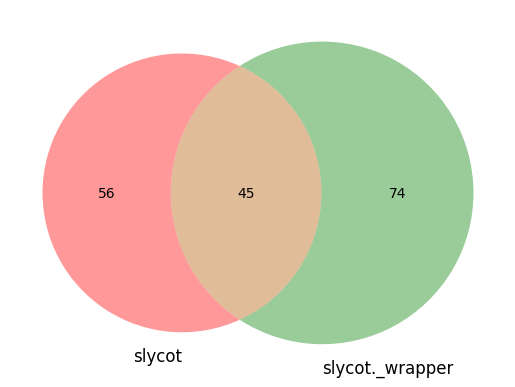

In [9]:
venn2(subsets = (len(set(slycot_wrapper)), 
                 len(set(slycot_f2py_wrapper)), 
                 len(intersection)), set_labels = ('slycot', 'slycot._wrapper'))
plt.show()